# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Риск-и-прибыль-для-каждого-региона" data-toc-modified-id="Риск-и-прибыль-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Риск и прибыль для каждого региона</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import math
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy import stats as st
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error

In [2]:
state = RandomState(12345) 

In [3]:
data_reg_1=pd.read_csv('datasets/geo_data_0.csv')
data_reg_2=pd.read_csv('datasets/geo_data_1.csv')
data_reg_3=pd.read_csv('datasets/geo_data_2.csv')

In [4]:
data_reg_1
display(data_reg_1.head())
display(data_reg_1['product'].describe())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

In [5]:
display(data_reg_2.head())
display(data_reg_2['product'].describe())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

In [6]:
display(data_reg_3.head())
display(data_reg_3['product'].describe())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

<i>Поскольку мы не знаем что означают колонки f0,f1,f2, посмотрим на product для всех 3х датафреймов в сравнении.</i>

In [7]:
result = pd.concat([data_reg_1['product'].describe(), data_reg_2['product'].describe(),data_reg_3['product'].describe()], axis=1, join="inner")
result.columns=['region_1_product','region_2_product','region_3_product' ]
result

,region_1_product,region_2_product,region_3_product
count,100000.000000,100000.000000,100000.000000
mean,92.500000,68.825000,95.000000
std,44.288691,45.944423,44.749921
min,0.000000,0.000000,0.000000
25%,56.497507,26.953261,59.450441
50%,91.849972,57.085625,94.925613
75%,128.564089,107.813044,130.595027
max,185.364347,137.945408,190.029838


<i>Сразу видим, что 2й регион меньшепо запасам продукта, по сравнению с 1м и 3м </i>

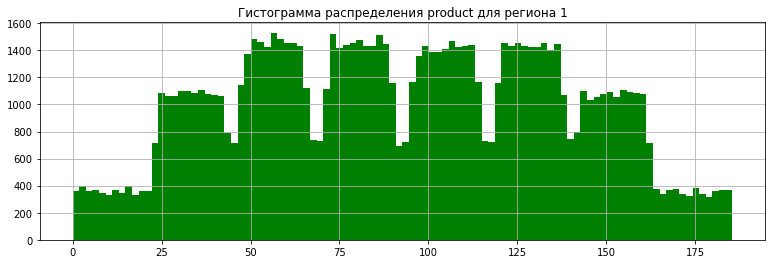

In [8]:
data_reg_1['product'].hist(bins = 100,figsize=(13,4),color='green')
plt.title('Гистограмма распределения product для региона 1')
plt.show()


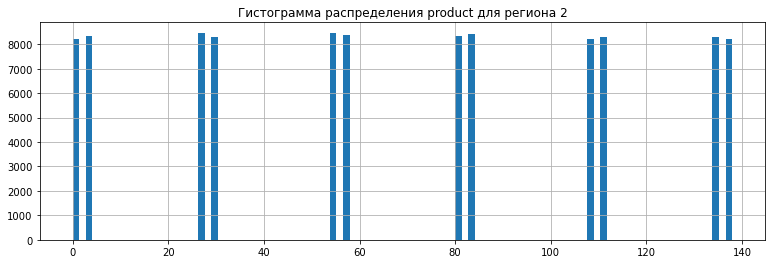

In [9]:
data_reg_2['product'].hist(bins = 100,figsize=(13,4))
plt.title('Гистограмма распределения product для региона 2')
plt.show()


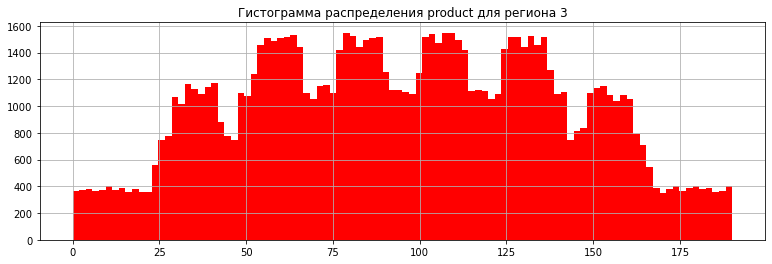

In [10]:
data_reg_3['product'].hist(bins = 100,figsize=(13,4), color='red')
plt.title('Гистограмма распределения product для региона 3')
plt.show()

<i>Гистограмма для региона 2 имеет странну логику по сравнению с регионом 1 и 3. Но не зная смысла параметров f1,f2,f3 сложно сказать что-то о причинах. </i>

<i>Проверим наличие пропусков</i>

In [11]:
print(data_reg_1.isnull().mean())
print(data_reg_2.isnull().mean())
print(data_reg_3.isnull().mean())

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


<i>Пропусков нет</i>

<i>Проверим наличие дубликатов </i>

In [12]:
print(data_reg_1.duplicated().sum())
print(data_reg_2.duplicated().sum())
print(data_reg_3.duplicated().sum())


0
0
0


<i>Полных дубликатов нет </i>

## Обучение и проверка модели

In [13]:
#Напишем функцию для поиска лучших параметров линейной регрессии

def lin_regression_grid (data, target_column):
    target = data[target_column]
    features=data.drop([target_column,'id'],axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    parameters = {'fit_intercept':[True,False], 'copy_X':[True, False], 'normalize':[True,False]}
    model = GridSearchCV(estimator=LinearRegression(), param_grid=parameters, cv=5)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)        


    metrics = {}
    metrics['mse'] =  round(mean_squared_error(target_valid, predicted_valid),4)
    metrics['rmse'] =  round(metrics['mse'] ** 0.5,4)
    metrics['r2'] =  round(r2_score(target_valid, predicted_valid),4) #вычислим коэффициент детерминации, чтобы не сравнивать модель
    #с Dummy Regressor
    metrics['mae'] =  round(mean_absolute_error(target_valid, predicted_valid),4)
    metrics['best_model_params'] = model.best_params_
    metrics['predicted_valid'] = predicted_valid
    metrics['target_valid'] = target_valid
    
    return metrics

In [14]:
target_column = 'product'

metrics_reg_1 = lin_regression_grid(data_reg_1, target_column)
metrics_reg_2 = lin_regression_grid(data_reg_2, target_column)
metrics_reg_3 = lin_regression_grid(data_reg_3, target_column)

In [15]:
print('RMSE для предсказаний по региону 1:',metrics_reg_1['rmse'])
print('Средний объем предсказанного сырья для региона 1:',metrics_reg_1['predicted_valid'].mean())
print('R2 для региона 1:',metrics_reg_1['r2'])
print('MAE для региона 1:',metrics_reg_1['mae'])
print('----------------------')
print('RMSE для предсказаний по региону 2:',metrics_reg_2['rmse'])
print('Средний объем предсказанного сырья для региона 2:',metrics_reg_2['predicted_valid'].mean())
print('R2 для региона 2:',metrics_reg_2['r2'])
print('MAE для региона 2:',metrics_reg_2['mae'])
print('----------------------')
print('RMSE для предсказаний по региону 3:',metrics_reg_3['rmse'])
print('Средний объем предсказанного сырья для региона 3:',metrics_reg_3['predicted_valid'].mean())
print('R2 для региона 3:',metrics_reg_3['r2'])
print('MAE для региона 3:',metrics_reg_3['mae'])

RMSE для предсказаний по региону 1: 37.5794
Средний объем предсказанного сырья для региона 1: 92.59256778438035
R2 для региона 1: 0.2799
MAE для региона 1: 30.9196
----------------------
RMSE для предсказаний по региону 2: 0.8931
Средний объем предсказанного сырья для региона 2: 68.728546895446
R2 для региона 2: 0.9996
MAE для региона 2: 0.7188
----------------------
RMSE для предсказаний по региону 3: 40.0297
Средний объем предсказанного сырья для региона 3: 94.96504596800489
R2 для региона 3: 0.2052
MAE для региона 3: 32.7927


In [16]:
df = pd.DataFrame([[metrics_reg_1['rmse'], metrics_reg_1['mae'],metrics_reg_1['r2'],metrics_reg_1['predicted_valid'].mean()],
                   [metrics_reg_2['rmse'], metrics_reg_2['mae'],metrics_reg_2['r2'],metrics_reg_2['predicted_valid'].mean()],
                   [metrics_reg_3['rmse'], metrics_reg_3['mae'],metrics_reg_3['r2'],metrics_reg_3['predicted_valid'].mean()]], 
                   columns=['RMSE','MAE','R2','Product_mean' ], index=['Region_1', 'Region_2','Region_3'])
df


,RMSE,MAE,R2,Product_mean
Region_1,37.5794,30.9196,0.2799,92.592568
Region_2,0.8931,0.7188,0.9996,68.728547
Region_3,40.0297,32.7927,0.2052,94.965046


Лучше всего модель обучилась на данных региона 2. Здесь самая малая MSE и коэффициент детерминации. О причинах сказать сложно, так как мы не знаем что такое fo,f1,f2 

Средний запас продукта во 2м регионе ощутимо ниже региона 1 и 2, но качество данных для обучения модели гораздо лучше. Видимо этот регион более стабильный и предсказуемый, по неизвесным нам причинам (геологиеческим, количество и качество данных в регионе выше, тип месторождения, доступные способы разработки в регионе и т.д.)

Регион 1 и 3 похожи друг с другом по параметрам.

## Подготовка к расчёту прибыли

In [17]:
#Расчитаем объем сырья для безубыточной разработки новой скважины.
BUDGET = 10_000_000_000
NUMBER_OF_WELLS= 200
COST_PER_WELL=BUDGET/NUMBER_OF_WELLS
THOUSAND_OF_BARRELS_PRICE = 450*1000
ENOUGH_VOLUME = math.ceil(COST_PER_WELL/THOUSAND_OF_BARRELS_PRICE)
print('Достаточный объем сырья для безубыточной разработки новой скважины:',ENOUGH_VOLUME)

Достаточный объем сырья для безубыточной разработки новой скважины: 112


In [18]:
#Сгруппируем необходимые нам для дальнейшей работы данные в таблицы. Добавим колонку с доходом 't_income'
region_1_df = pd.DataFrame(metrics_reg_1['target_valid'])
region_1_df['predicted'] = metrics_reg_1['predicted_valid']
region_1_df['t_income'] = metrics_reg_1['target_valid'] * THOUSAND_OF_BARRELS_PRICE
region_1_df['region'] = 1

region_2_df = pd.DataFrame(metrics_reg_2['target_valid'])
region_2_df['predicted'] = metrics_reg_2['predicted_valid']
region_2_df['t_income'] = metrics_reg_2['target_valid'] * THOUSAND_OF_BARRELS_PRICE
region_2_df['region'] = 2

region_3_df = pd.DataFrame(metrics_reg_3['target_valid'])
region_3_df['predicted'] = metrics_reg_3['predicted_valid']
region_3_df['t_income'] = metrics_reg_3['target_valid'] * THOUSAND_OF_BARRELS_PRICE
region_3_df['region'] = 3

display (region_1_df.head())
print(region_1_df.shape)
display (region_2_df.head())
print(region_2_df.shape)
display (region_3_df.head())
print(region_3_df.shape)

,product,predicted,t_income,region
71751,10.038645,95.894952,4.517390e+06,1
80493,114.551489,77.572583,5.154817e+07,1
2655,132.603635,77.892640,5.967164e+07,1
53233,169.072125,90.175134,7.608246e+07,1
91141,122.325180,70.510088,5.504633e+07,1


(25000, 4)


,product,predicted,t_income,region
71751,80.859783,82.663314,3.638690e+07,2
80493,53.906522,54.431786,2.425793e+07,2
2655,30.132364,29.748760,1.355956e+07,2
53233,53.906522,53.552133,2.425793e+07,2
91141,0.000000,1.243856,0.000000e+00,2


(25000, 4)


,product,predicted,t_income,region
71751,61.212375,93.599633,2.754557e+07,3
80493,41.850118,75.105159,1.883255e+07,3
2655,57.776581,90.066809,2.599946e+07,3
53233,100.053761,105.162375,4.502419e+07,3
91141,109.897122,115.303310,4.945370e+07,3


(25000, 4)


In [19]:
#Посмотрим на средние значения.
region_1_df.pivot_table(index='region',aggfunc='mean').append(region_2_df.pivot_table(index='region',aggfunc='mean')).append(region_3_df.pivot_table(index='region',aggfunc='mean'))

,predicted,product,t_income
region,,,
1,92.592568,92.078597,4.143537e+07
2,68.728547,68.723136,3.092541e+07
3,94.965046,94.884233,4.269790e+07


Таким образом, средний объем сырья на выборках валид в каждом регионе ниже безубыточного оъема сырья '112'. Только по объему сырья регион 2 выглядит невыгодным. Нужно подробней смотреть на прибыли.

## Расчёт прибыли и рисков 

In [20]:
#Расчитаем прибыль для полученного объема сырья. Напишем функцию,в которую будем подставлять
#результаты, полученные ранее
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:NUMBER_OF_WELLS]
    product = selected_points.sum()
    revenue = product * THOUSAND_OF_BARRELS_PRICE/1_000_000_000
    cost = BUDGET/1_000_000_000
    return (revenue - cost)    

In [21]:
profit_reg_1=profit(region_1_df['product'],region_1_df['predicted']).round(5)
profit_reg_2=profit(region_2_df['product'],region_2_df['predicted']).round(5)
profit_reg_3=profit(region_3_df['product'],region_3_df['predicted']).round(5)
profit_table = pd.DataFrame([[profit_reg_1], [profit_reg_2],[profit_reg_3]], 
                   columns=['Profit, млрд.руб' ], index=['Region_1', 'Region_2','Region_3'])
profit_table

,"Profit, млрд.руб"
Region_1,3.32083
Region_2,2.41509
Region_3,2.71035


## Риск и прибыль для каждого региона

In [22]:
def get_bootstrap_metrics(product,predicted,sample_size):
    values=[]
    for i in range(1000):
        target_subsample = product.sample(n=sample_size, replace=True, random_state=state)
        probs_subsample = predicted[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))
    metrics = {}
    values = pd.Series(values)
    metrics['lower'] = values.quantile(0.025)
    metrics['hight'] = values.quantile(0.975)
    metrics['loss'] = values[values<0]
    metrics['loss_probability']=metrics['loss'].count()/len(values)*100
    metrics['mean'] = values.mean()
    return metrics
    
region_1_btstrp_metrics= get_bootstrap_metrics(region_1_df['product'],region_1_df['predicted'],500)  
region_2_btstrp_metrics= get_bootstrap_metrics(region_2_df['product'],region_2_df['predicted'],500)    
region_3_btstrp_metrics= get_bootstrap_metrics(region_3_df['product'],region_3_df['predicted'],500)

values_table={'Region_1':[region_1_btstrp_metrics['mean'],region_1_btstrp_metrics['hight'],region_1_btstrp_metrics['lower'],region_1_btstrp_metrics['loss_probability']],
              'Region_2':[region_2_btstrp_metrics['mean'],region_2_btstrp_metrics['hight'],region_2_btstrp_metrics['lower'],region_2_btstrp_metrics['loss_probability']],
              'Region_3':[region_3_btstrp_metrics['mean'],region_3_btstrp_metrics['hight'],region_3_btstrp_metrics['lower'],region_3_btstrp_metrics['loss_probability']]}
values_table_df=pd.DataFrame(data=values_table, index =['Средняя_прибыль', '97,5%-квантиль','2,5%-квантиль','Риск_убытков,%'] )
values_table_df

,Region_1,Region_2,Region_3
Средняя_прибыль,0.425939,0.518259,0.420194
"97,5%-квантиль",0.947976,0.953613,0.989630
"2,5%-квантиль",-0.102090,0.128123,-0.115853
"Риск_убытков,%",6.000000,0.300000,6.200000


## Вывод

В результате проделанного исследования, наибольшую прибыль показал Регион №1, 3.32083 млрд. руб.
Однако, в плане рисков, выгодней разрабыватывать скважину Региона №2, в которой наиболее высокая средняя прибыль и наименьшая вероятность убытка, плюс модель более точная.
Таким образом, следует разрабатывать скважины Региона №2 в первую очередь. При увеличении цены на нефть, стоит разрабывать скважины Региона №1, так как снизится цена риска.